In [1]:
from google.colab import files
uploaded = files.upload()


Saving spam_or_not_spam.csv to spam_or_not_spam.csv


In [27]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/spam_or_not_spam.csv")

texts = df["email"].values
labels = df["label"].values

In [28]:
def preprocess(text):
    if isinstance(text, float):
        return ""
    return str(text).lower()

texts = [preprocess(t) for t in texts]

In [29]:
vocab = list(set(" ".join(texts).split()))
vocab_size = len(vocab)

word_to_index = {word:i for i, word in enumerate(vocab)}

def text_to_vector(text):
    vector = np.zeros(vocab_size)
    for word in text.split():
        if word in word_to_index:
            vector[word_to_index[word]] += 1
    return vector

X = np.array([text_to_vector(t) for t in texts])
y = labels


In [30]:
np.random.seed(42)

w = np.random.randn(vocab_size) * 0.01
b = 0.0
lr = 0.1


In [31]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [39]:
accuracy_list = []
loss_list = []



epochs = 100

for epoch in range(epochs):

    z = np.dot(X, w) + b
    y_pred = sigmoid(z)

    dz = y_pred - y
    dw = np.dot(X.T, dz) / len(X)
    db = np.sum(dz) / len(X)


    w -= lr * dw
    b -= lr * db


    loss = -np.mean(y*np.log(y_pred + 1e-8) + (1-y)*np.log(1-y_pred + 1e-8))
    loss_list.append(loss)

    predictions = y_pred > 0.5
    accuracy = np.mean(predictions == y)
    accuracy_list.append(accuracy)

    if epoch % 10 == 0:
        print(f"Epoch {epoch} | Loss: {loss:.4f} | Accuracy: {accuracy:.4f}")


Epoch 0 | Loss: 0.0899 | Accuracy: 0.9757
Epoch 10 | Loss: 0.0638 | Accuracy: 0.9843
Epoch 20 | Loss: 0.0619 | Accuracy: 0.9857
Epoch 30 | Loss: 0.0603 | Accuracy: 0.9857
Epoch 40 | Loss: 0.0588 | Accuracy: 0.9857
Epoch 50 | Loss: 0.0574 | Accuracy: 0.9867
Epoch 60 | Loss: 0.0560 | Accuracy: 0.9867
Epoch 70 | Loss: 0.0548 | Accuracy: 0.9870
Epoch 80 | Loss: 0.0537 | Accuracy: 0.9870
Epoch 90 | Loss: 0.0526 | Accuracy: 0.9870


In [40]:
predictions = sigmoid(np.dot(X, w) + b) > 0.5
accuracy = np.mean(predictions == y)
print("Accuracy:", accuracy)


Accuracy: 0.987


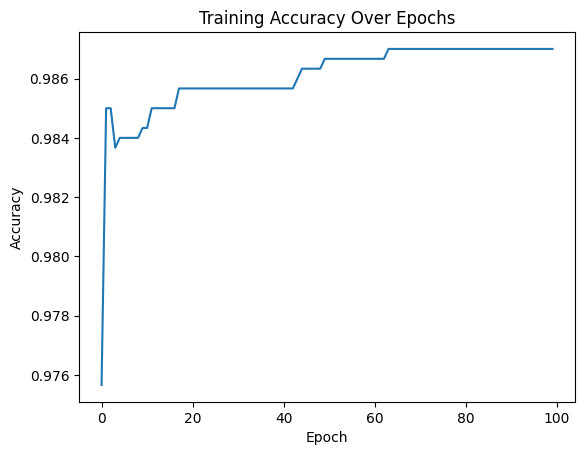

In [41]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(epochs), accuracy_list)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Over Epochs")
plt.show()


In [35]:
def predict(email):
    email = preprocess(email)
    vec = text_to_vector(email)
    z = np.dot(vec, w) + b
    prob = sigmoid(z)
    return "Spam" if prob > 0.5 else "Not Spam"

print(predict("saurya is a girl"))


Not Spam
